<a href="https://colab.research.google.com/github/ndb796/faceswap_examples/blob/master/FaceSwap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Initialization

In [0]:
# Display Virtual Machine system information, use this to check the assigned GPU
def install_dependencies():
    !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi;
    !pip install gputil;
    !pip install psutil;
    !pip install humanize;%%capture

def printm():
    GPUs = GPU.getGPUs()

    if len(GPUs) == 0:
        print("No GPU available.")
        return

    gpu = GPUs[0]
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

from IPython.utils import io
from google.colab import drive
import psutil
import humanize
import os
 
with io.capture_output() as captured:
    install_dependencies()
print("Dependencies installed.")

import GPUtil as GPU
printm()

Dependencies installed.
Gen RAM Free: 12.7 GB  | Proc size: 157.0 MB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


In [0]:
# Clone Faceswap github repository

!rm -rf faceswap
!git clone https://github.com/deepfakes/faceswap.git
  
!pip install tensorflow-gpu==1.14.0
!pip install -r faceswap/requirements.txt

Cloning into 'faceswap'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 6817 (delta 8), reused 3 (delta 1), pack-reused 6798
Receiving objects: 100% (6817/6817), 193.63 MiB | 33.62 MiB/s, done.
Resolving deltas: 100% (4708/4708), done.
Ignoring pywin32: markers 'sys_platform == "win32"' don't match your environment
Ignoring pynvx: markers 'sys_platform == "darwin"' don't match your environment
  Cloning https://github.com/deepfakes/nvidia-ml-py3.git to /tmp/pip-req-build-yh_skxq0
  Running command git clone -q https://github.com/deepfakes/nvidia-ml-py3.git /tmp/pip-req-build-yh_skxq0
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.1-cp36-none-any.whl size=19267 sha256=eb7d9cc2fb049411fca17f317c46ad21d5fe7c9ebee2611042b21d02fd870663
  Stored in directory: /tmp/pip-ephem-wheel-cache-s6_v3oec/wheels/68/a1/dd/fc48b42f331cd35e0dc0d6d75804a6b21839f30b095c43ffc8
Successfully 

### Training Phase

In [0]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp /content/drive/'My Drive'/'Colab Notebooks'/images/source_images.zip source_images.zip
!cp /content/drive/'My Drive'/'Colab Notebooks'/images/target_images.zip target_images.zip

In [0]:
!unzip source_images.zip -d source_images
!rm source_images.zip

Archive:  source_images.zip
  inflating: source_images/bush_clipped_1_000001_0.png  
  inflating: source_images/bush_clipped_1_000002_0.png  
  inflating: source_images/bush_clipped_1_000003_0.png  
  inflating: source_images/bush_clipped_1_000004_0.png  
  inflating: source_images/bush_clipped_1_000005_0.png  
  inflating: source_images/bush_clipped_1_000006_0.png  
  inflating: source_images/bush_clipped_1_000007_0.png  
  inflating: source_images/bush_clipped_1_000008_0.png  
  inflating: source_images/bush_clipped_1_000009_0.png  
  inflating: source_images/bush_clipped_1_000010_0.png  
  inflating: source_images/bush_clipped_1_000011_0.png  
  inflating: source_images/bush_clipped_1_000012_0.png  
  inflating: source_images/bush_clipped_1_000013_0.png  
  inflating: source_images/bush_clipped_1_000014_0.png  
  inflating: source_images/bush_clipped_1_000015_0.png  
  inflating: source_images/bush_clipped_1_000016_0.png  
  inflating: source_images/bush_clipped_1_000017_0.png  
  i

In [0]:
!unzip target_images.zip -d target_images
!rm target_images.zip

Archive:  target_images.zip
  inflating: target_images/obama_clipped_1_000011_0.png  
  inflating: target_images/obama_clipped_1_000012_0.png  
  inflating: target_images/obama_clipped_1_000013_0.png  
  inflating: target_images/obama_clipped_1_000014_0.png  
  inflating: target_images/obama_clipped_1_000015_0.png  
  inflating: target_images/obama_clipped_1_000018_0.png  
  inflating: target_images/obama_clipped_1_000019_0.png  
  inflating: target_images/obama_clipped_1_000020_0.png  
  inflating: target_images/obama_clipped_1_000021_0.png  
  inflating: target_images/obama_clipped_1_000022_0.png  
  inflating: target_images/obama_clipped_1_000023_0.png  
  inflating: target_images/obama_clipped_1_000031_0.png  
  inflating: target_images/obama_clipped_1_000035_0.png  
  inflating: target_images/obama_clipped_1_000036_0.png  
  inflating: target_images/obama_clipped_1_000037_0.png  
  inflating: target_images/obama_clipped_1_000038_0.png  
  inflating: target_images/obama_clipped_1_0

In [0]:
from time import sleep,time
from IPython.display import display,HTML
import base64
from threading import Thread

image_path = "faceswap/training_preview.jpg"
!touch '{image_path}'

class PreviewImg:
    def __init__(self):
        self.cancel = False
        self.fig = display(HTML('<img src="https://dummyimage.com/1024x618/000/ffffff&text=Preview+Loading..." />'), display_id=True)
        print("Created display.")

    def update(self):
        print("Updating display.")
        with open(image_path, 'rb') as image:
            encoded = str(base64.b64encode(image.read()))[2:-1]
            self.fig.update(HTML('<img src="data:image/jpg;base64,' + encoded + '" width="1024" height="618" />'))

    def task(self):
        while not self.cancel:
            sleep(5 * 60) # Per every 5 minutes
            if not self.fig:
                print("Figure doesn't exist.")
                break
            self.update()

Preview image size is reduced 3 times right click and save the image to view it in full size



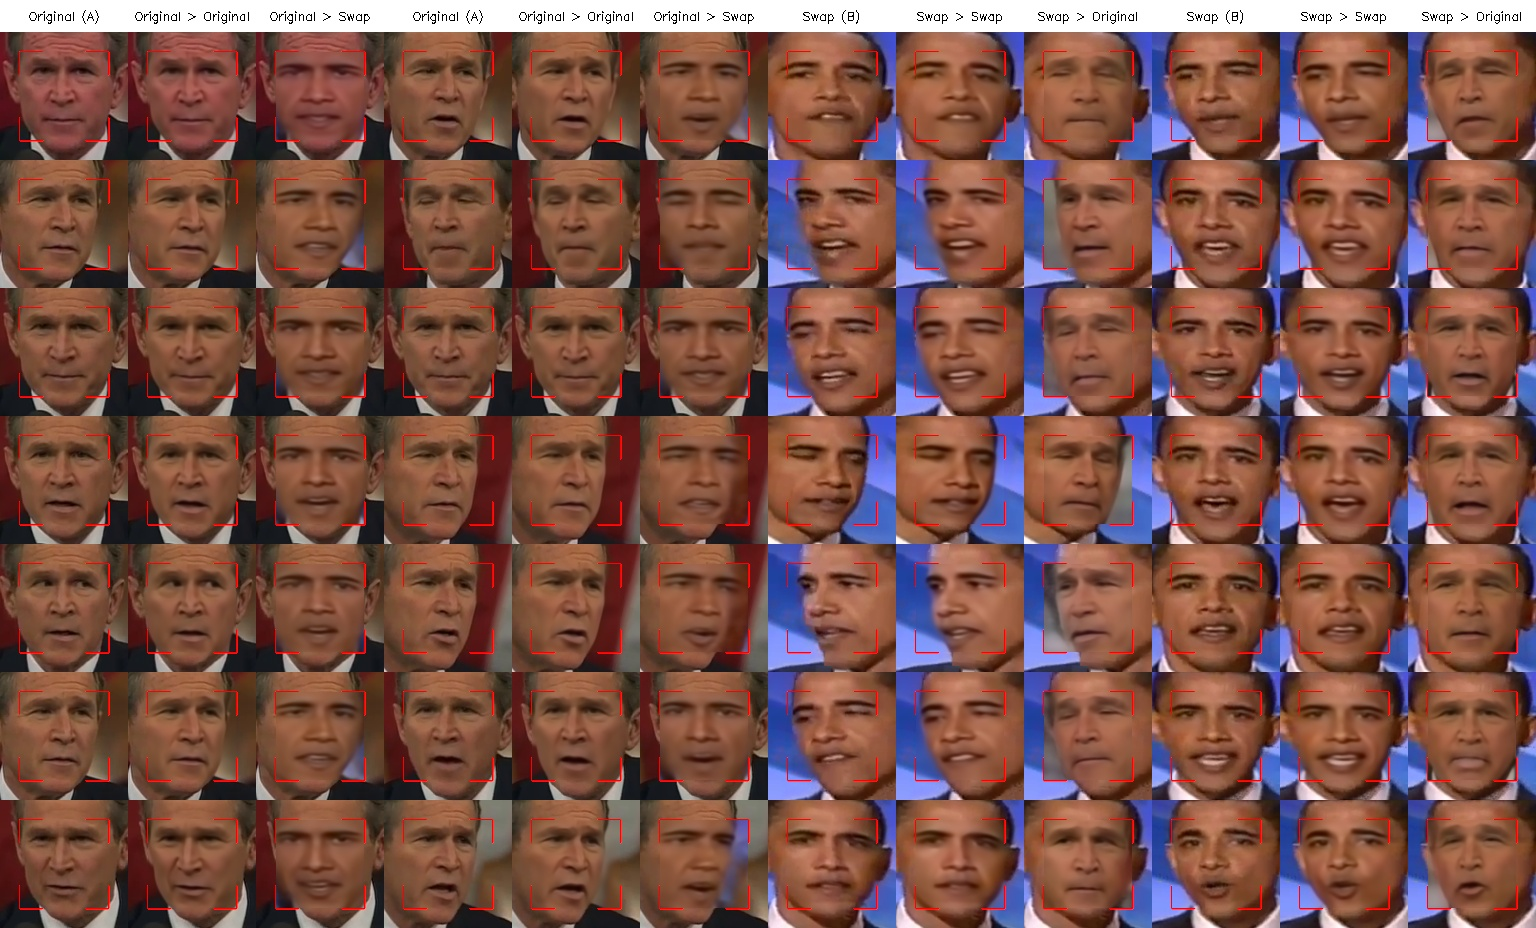

Created display.
First time configuration. Please select the required backend
1: AMD, 2: CPU, 3: NVIDIA: 3
Faceswap config written to: /content/faceswap/config/.faceswap
Setting Faceswap backend to NVIDIA
02/10/2020 04:36:26 INFO     Log level set to: INFO
Using TensorFlow backend.
02/10/2020 04:36:28 INFO     Model A Directory: /content/source_images
02/10/2020 04:36:28 INFO     Model B Directory: /content/target_images
02/10/2020 04:36:28 INFO     Training data directory: /content/drive/My Drive/Colab Notebooks/new_models
02/10/2020 04:36:28 INFO     ===================================================
02/10/2020 04:36:28 INFO       Starting
02/10/2020 04:36:28 INFO       Press 'ENTER' to save and quit
02/10/2020 04:36:28 INFO       Press 'S' to save model weights immediately
02/10/2020 04:36:28 INFO     ===================================================
02/10/2020 04:36:29 INFO     Loading data, this may take a while...
02/10/2020 04:36:29 INFO     Loading Model from Villain plugin.

In [0]:
# 기본적으로 모델 파일이 이미 존재하면 해당 모델을 이용해 이어서 학습을 진행하므로, 새로운 타겟 이미지로 학습하는 경우 새로운 모델 파일 경로를 정의하기
!echo "Preview image size is reduced 3 times right click and save the image to view it in full size"

prev_img = PreviewImg()
thread = Thread(target=prev_img.task)
thread.start()

!python3 faceswap/faceswap.py train -A 'source_images' -B 'target_images' -m '/content/drive/My Drive/Colab Notebooks/new_models' -t 'villain' -bs 16 -s 330 -w -nl

### Converting

In [0]:
!rm -rf faceswap_examples
!git clone https://github.com/ndb796/faceswap_examples

Cloning into 'faceswap_examples'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 2627 (delta 6), reused 7 (delta 2), pack-reused 2613
Receiving objects: 100% (2627/2627), 413.84 MiB | 41.40 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Checking out files: 100% (2610/2610), done.


In [0]:
!cp -r '/content/drive/My Drive/Colab Notebooks/new_models' 'my_models'
!ls my_models

new_models		 villain_decoder_B.h5	  villain_encoder.h5.bk
villain_decoder		 villain_decoder_B.h5.bk  villain_state.json
villain_decoder_A.h5.bk  villain_encoder.h5	  villain_state.json.bk


#### Basic Converting

In [0]:
!python3 faceswap/faceswap.py convert -i 'faceswap_examples/converting/bush_clipped_1.mp4' -o 'output_images' -m 'my_models'

Setting Faceswap backend to NVIDIA
02/10/2020 05:59:48 INFO     Log level set to: INFO
Using TensorFlow backend.
02/10/2020 05:59:50 INFO     Input Video: /content/faceswap_examples/converting/bush_clipped_1.mp4
02/10/2020 05:59:50 INFO     Reading alignments from: '/content/faceswap_examples/converting/bush_clipped_1_alignments.fsa'
02/10/2020 05:59:50 INFO     Loading Writer from Opencv plugin...
02/10/2020 05:59:50 INFO     Loading Model from Villain plugin...
02/10/2020 05:59:50 INFO     Using configuration saved in state file
02/10/2020 05:59:52 ERROR    Model could not be found in folder '/content/my_models'. Exiting
Converting:   0% 0/401 [00:02<?, ?it/s]


In [0]:
!ffmpeg -y -i faceswap_examples/converting/bush_clipped_1.mp4 -vn -acodec libmp3lame -ar 44.1k -ac 2 -ab 128k bush_clipped_1.mp3
!ffmpeg -framerate 25 -pix_fmt yuv420p -i output_images/bush_clipped_1_%6d.png -c:v libx264 basic_output.mp4
!ffmpeg -i basic_output.mp4 -i bush_clipped_1.mp3 basic_output_result.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('basic_output_result.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#### Reversed Converting

In [0]:
!cp my_models/villain_decoder_A.h5.bk my_models/villain_decoder_B.h5
!cp my_models/villain_decoder_B.h5.bk my_models/villain_decoder_A.h5

In [0]:
!python3 faceswap/faceswap.py convert -i 'faceswap_examples/converting/obama_clipped_1.mp4' -o 'output_images' -m 'my_models'

Setting Faceswap backend to NVIDIA
02/10/2020 06:02:03 INFO     Log level set to: INFO
Using TensorFlow backend.
02/10/2020 06:02:05 INFO     Input Video: /content/faceswap_examples/converting/obama_clipped_1.mp4
02/10/2020 06:02:05 INFO     Reading alignments from: '/content/faceswap_examples/converting/obama_clipped_1_alignments.fsa'
02/10/2020 06:02:05 INFO     Loading Writer from Opencv plugin...
02/10/2020 06:02:05 INFO     Loading Model from Villain plugin...
02/10/2020 06:02:05 INFO     Using configuration saved in state file
02/10/2020 06:02:10 INFO     Loaded model from disk: '/content/my_models'
02/10/2020 06:02:11 INFO     Loading Mask from Box_Blend plugin...
02/10/2020 06:02:11 INFO     Loading Mask from Mask_Blend plugin...
02/10/2020 06:02:11 INFO     Loading Color from Avg_Color plugin...
Converting: 100% 1039/1039 [00:57<00:00, 18.17it/s]
02/10/2020 06:03:03 INFO     -------------------------
02/10/2020 06:03:03 INFO     Images found:        1039
02/10/2020 06:03:03 IN

In [0]:
!ffmpeg -y -i faceswap_examples/converting/obama_clipped_1.mp4 -vn -acodec libmp3lame -ar 44.1k -ac 2 -ab 128k obama_clipped_1.mp3
!ffmpeg -framerate 30000/1001 -pix_fmt yuv420p -i output_images/obama_clipped_1_%6d.png -c:v libx264 reversed_output.mp4
!ffmpeg -i reversed_output.mp4 -i obama_clipped_1.mp3 reversed_output_result.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('reversed_output_result.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [0]:
from google.colab import files

files.download('basic_output_result.mp4')
files.download('reversed_output_result.mp4')